In [3]:
# precondition: x is a list of natural numbers, y is a natural number.
#
# if any a + b = y exist such that a and b are both elements of x, where a != b,
# the function returns [a, b]; if none such a and b exist, the empty set is returned.
#
# the content of the list object from the calling method may not be altered.
#
# note: this is done with a list only for demonstration purposes;
# normally, among the data structures form Python, we would preferably use a set.
#
def natmatch_iter(x, y):
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            if (x[i]+x[j] == y) and (x[i] != x[j]):
                return [x[i], x[j]]
    return []

def natmatch_iter_debug(x, y):
    print("breakpoint S0: x = ", x, ", y = ", y, sep='')
    input()
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            if (x[i]+x[j] == y) and (x[i] != x[j]):
                print("breakpoint S7: match found, returning; i = ", i, ", j = ", j, \
                      ", x[i] = ", x[i], ", x[j] = ", x[j], ", x[i] + x[j] = ", x[i]+x[j], sep='')
                input()
                return [x[i], x[j]]
            else:
                print("breakpoint S8: no match so far, including for i = ", i, ", j = ", j, \
                      ", x[i] = ", x[i], ", x[j] = ", x[j], ", x[i] + x[j] = ", x[i]+x[j], sep='')
                input()
    print("breakpoint S3: no match found; returning")
    input()
    return []   

In [4]:
import random

k = 5

random.seed()
x = [random.randrange(k*k) for j in range(k)]
print("List x =", x, "where y =", k*k)
print("Return value obtained as", natmatch_iter_debug(x, k*k))

List x = [16, 13, 18, 23, 20] where y = 25
breakpoint S0: x = [16, 13, 18, 23, 20], y = 25

breakpoint S8: no match so far, including for i = 0, j = 1, x[i] = 16, x[j] = 13, x[i] + x[j] = 29

breakpoint S8: no match so far, including for i = 0, j = 2, x[i] = 16, x[j] = 18, x[i] + x[j] = 34

breakpoint S8: no match so far, including for i = 0, j = 3, x[i] = 16, x[j] = 23, x[i] + x[j] = 39

breakpoint S8: no match so far, including for i = 0, j = 4, x[i] = 16, x[j] = 20, x[i] + x[j] = 36

breakpoint S8: no match so far, including for i = 1, j = 2, x[i] = 13, x[j] = 18, x[i] + x[j] = 31

breakpoint S8: no match so far, including for i = 1, j = 3, x[i] = 13, x[j] = 23, x[i] + x[j] = 36

breakpoint S8: no match so far, including for i = 1, j = 4, x[i] = 13, x[j] = 20, x[i] + x[j] = 33

breakpoint S8: no match so far, including for i = 2, j = 3, x[i] = 18, x[j] = 23, x[i] + x[j] = 41

breakpoint S8: no match so far, including for i = 2, j = 4, x[i] = 18, x[j] = 20, x[i] + x[j] = 38

breakpoi

In [9]:
import random

k = 5000
repetitions = 1000

matches_iter = 0
for i in range(repetitions):
    k_input = [random.randrange(k*k) for j in range(k)]
    if len(natmatch_iter(k_input, k*k)) > 1:
        matches_iter += 1
    if (i+1) % (repetitions // 20) == 0:
        print(i + 1, round(matches_iter / (i+1), 6), sep="\t")

# challenge: find the value of this quantity for large k
#
print("fraction of length k lists with a match adding up to k squared:", matches_iter/repetitions)

50	0.48
100	0.41
150	0.38
200	0.375
250	0.38
300	0.39
350	0.38
400	0.375
450	0.38
500	0.386
550	0.387273
600	0.391667
650	0.396923
700	0.398571
750	0.397333
800	0.405
850	0.403529
900	0.398889
950	0.401053
1000	0.403
fraction of length k lists with a match adding up to k squared: 0.403


In [18]:
# precondition: x is a list of integers, y is a single-digit integer between 0 and 9
# postcondition: return [q1, q2, q3] as specified in the lecture
#
# challenge: create a more efficient function that solves the same problem
#
def mod10_count_naive(x, y):
    q1, q2, q3 = 0, 0, 0
    for i in range(len(x)):
        if x[i] % 10 == y:
            q1 += 1
        for j in range(len(x)):
            if i == j:
                continue
            elif (x[i]*x[j]) % 10 == y:
                q2 += 1
            for k in range(len(x)):
                if i == k or j == k:
                    continue
                elif (x[i]*x[j]*x[k]) % 10 == y:
                    q3 += 1
    return [q1, q2, q3]

In [21]:
import random

k = 5

random.seed()
x = [random.randrange(k*k) for j in range(k)]
y = random.randrange(10)

print("List x =", x, "where y =", y)
print("Return value obtained as [q1, q2, q3] =", mod10_count_naive(x, y))

List x = [24, 8, 19, 8, 2] where y = 4
Return value obtained as [q1, q2, q3] = [1, 2, 24]


In [12]:
import time
import random

step = 2
kmax = 200
repetitions = 20

perf_iter = {}
random.seed()

for k in range(0, kmax+1, step):
    time_measurement = 0
    for i in range(repetitions):
        x = [random.randrange(k*k) for j in range(k)]
        y = random.randrange(10)
        start = time.time()
        mod10_count_naive(x, y)
        end = time.time()
        time_measurement += end-start
    perf_iter[k] = time_measurement/repetitions
    
    print(k, perf_iter[k], sep='\t')

0	9.5367431640625e-07
2	3.4928321838378907e-06
4	1.5103816986083985e-05
6	4.7647953033447264e-05
8	0.00010575056076049805
10	0.00016651153564453124
12	0.00025377273559570315
14	0.00041273832321166994
16	0.0005746960639953613
18	0.0008049845695495605
20	0.0011807322502136231
22	0.0015154004096984864
24	0.001899862289428711
26	0.0023062944412231444
28	0.002781796455383301
30	0.003397035598754883
32	0.0044381141662597655
34	0.0049473166465759276
36	0.0059199690818786625
38	0.007124781608581543
40	0.008204948902130128
42	0.009437751770019532
44	0.011912238597869874
46	0.013664722442626953
48	0.015797066688537597
50	0.017937052249908447
52	0.01964545249938965
54	0.020915377140045165
56	0.023358488082885744
58	0.02586294412612915
60	0.028313446044921874
62	0.030790185928344725
64	0.03576785326004028
66	0.03951317071914673
68	0.041276729106903075
70	0.04627230167388916
72	0.05012154579162598
74	0.054620134830474856
76	0.06190111637115479
78	0.06557252407073974
80	0.06676410436630249
82	0.0731

<AxesSubplot:xlabel='input list size', ylabel='average runtime in seconds'>

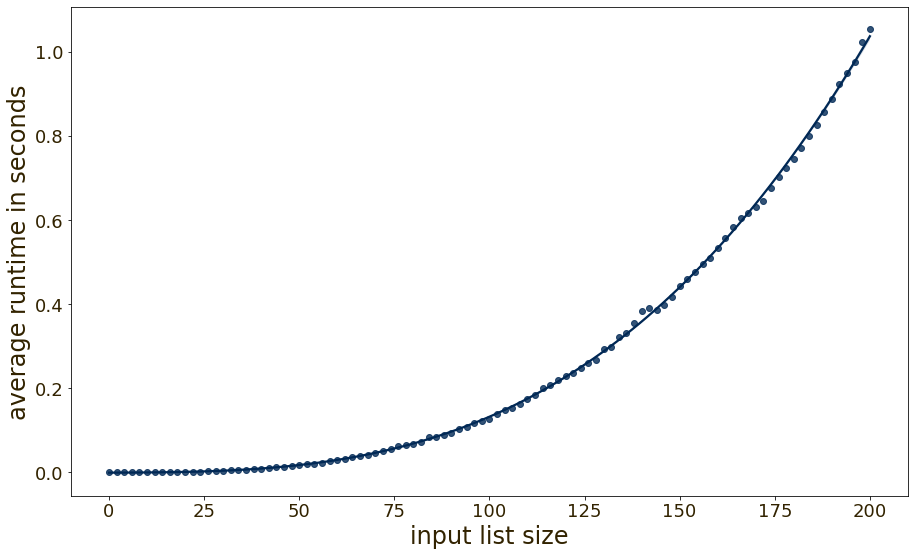

In [14]:
import seaborn as sbn
import matplotlib.pyplot as plt

keylist_iter = list(perf_iter.keys())
vallist_iter = list(perf_iter.values())

fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("input list size", fontsize=24, color="#322300")
ax.set_ylabel("average runtime in seconds", fontsize=24, color="#322300")

# show the data as a regression plot with a cubic fit (order = 3)
#
sbn.regplot(x=keylist_iter, y=vallist_iter, color='#002855', order=3)

In [15]:
# list with n = 200 elements for performance testing
#
x200 = [20674, 11633, 8618, 3966, 6885, 15989, 32051, 9792, 30817, 23417, 1420, 39408, 8908, 39007, 31282, 22764, 19111, 14656, 20658, 3213, 34768, 32452, 9808, 13885, 32611, 5376, 20146, 2432, 39805, 31476, 22245, 35263, 1121, 9315, 6339, 24362, 21272, 16485, 6129, 21197, 36781, 15168, 36069, 13612, 5327, 16078, 39047, 23158, 14039, 31705, 23125, 11679, 39477, 5429, 16166, 21403, 11773, 317, 10817, 17070, 15397, 17240, 16015, 37777, 25007, 29084, 19545, 5219, 9830, 763, 12718, 21327, 31619, 32982, 33681, 19686, 13799, 22386, 9049, 32294, 23339, 11682, 28712, 14777, 33012, 24047, 13255, 37662, 37118, 11836, 36578, 11884, 22617, 6784, 19248, 33797, 2844, 19525, 10358, 25964, 7133, 4701, 35483, 37107, 30512, 9479, 31821, 38829, 14446, 16455, 9181, 38693, 37374, 28439, 1886, 21768, 34728, 6066, 22346, 264, 18495, 32083, 27651, 914, 20122, 37, 10277, 27546, 1678, 35704, 12747, 92, 10035, 16245, 24834, 28993, 38, 30773, 37294, 12121, 29464, 29437, 36314, 7102, 17136, 24754, 10778, 28326, 36576, 20562, 31742, 15229, 14213, 3736, 33775, 36094, 30970, 2059, 32205, 35793, 10357, 33123, 5496, 22560, 5876, 37680, 26200, 10193, 16057, 33859, 2019, 8539, 2416, 4439, 15279, 29905, 31335, 1344, 36215, 23618, 27207, 5417, 29735, 16258, 12045, 31127, 14090, 34355, 36555, 31805, 27363, 32230, 20689, 35049, 28937, 29870, 22063, 27636, 2873, 350]

# list with n = 1000 elements for performance testing
#
x1000 = [759099, 176511, 874067, 486800, 490790, 229090, 570416, 331257, 701444, 191680, 119764, 380964, 890150, 90470, 317716, 706443, 598320, 504176, 929737, 236176, 889040, 999867, 496044, 245955, 811768, 290297, 842831, 473391, 529440, 364150, 150346, 786022, 936686, 85956, 225036, 497692, 566283, 872184, 818759, 550966, 413003, 382362, 794689, 446478, 633368, 921631, 885103, 711119, 803204, 714347, 673581, 619801, 725482, 904452, 894959, 469185, 80225, 455345, 13718, 931809, 438982, 662770, 478419, 998034, 639388, 791859, 583323, 861558, 244054, 577355, 211591, 218649, 552854, 884265, 424349, 301941, 980615, 842425, 891345, 771404, 868792, 488988, 430810, 97922, 321840, 660009, 360610, 896948, 362319, 687654, 558715, 16304, 530727, 409156, 121934, 191371, 498379, 71028, 830212, 934206, 622838, 610736, 275275, 1871, 671872, 52303, 275955, 553532, 578100, 2818, 968830, 253758, 574496, 612976, 560563, 967641, 259768, 545596, 178670, 556426, 168498, 842436, 989120, 220198, 852554, 382081, 353389, 254514, 292814, 136001, 87682, 222951, 844958, 830154, 72844, 783419, 636148, 290558, 187632, 168559, 872390, 504847, 376992, 997954, 621205, 10817, 985640, 444056, 396000, 40441, 69814, 746935, 307509, 488654, 631092, 276594, 599897, 565826, 846047, 435967, 922650, 104363, 947298, 814558, 103425, 205872, 682663, 853982, 111231, 76009, 633745, 204089, 728524, 908650, 343304, 803121, 70611, 743173, 767787, 384393, 407468, 869230, 240575, 39137, 261583, 846827, 318814, 672609, 373456, 590178, 667032, 456403, 642961, 394678, 381537, 984069, 118630, 230806, 380466, 396880, 678223, 664987, 234591, 702672, 175088, 62202, 960929, 193088, 261832, 614494, 570144, 354305, 952236, 193536, 508172, 672419, 694551, 282607, 879348, 719629, 402784, 834430, 106205, 621520, 823857, 611024, 95101, 550271, 273161, 298493, 546506, 128860, 203164, 675411, 549768, 809270, 910851, 262130, 697081, 756648, 745736, 43535, 600087, 63979, 893888, 447262, 605306, 384093, 711257, 515357, 815134, 355344, 80146, 903859, 577909, 579012, 600633, 979217, 614228, 450852, 206144, 935175, 442220, 615608, 186591, 290065, 99431, 230095, 216445, 699614, 777932, 412126, 216529, 139979, 866260, 929838, 79458, 454532, 399462, 224694, 691781, 231709, 595974, 837595, 777697, 157141, 62806, 437022, 568172, 154078, 433667, 702151, 588069, 997599, 427947, 554039, 650003, 388182, 84871, 228772, 189137, 983525, 47771, 737424, 597345, 552426, 597134, 822356, 547223, 413741, 623328, 434399, 342550, 285059, 758789, 917646, 32244, 673447, 634752, 716229, 267264, 612989, 221683, 729129, 718098, 989923, 443507, 56899, 821179, 316735, 148720, 313688, 829608, 408613, 721487, 280808, 694541, 192774, 716972, 864473, 548778, 835479, 314128, 877210, 896329, 316522, 434457, 863520, 302811, 855764, 968508, 727447, 94936, 435499, 369354, 626743, 899770, 927037, 627951, 42823, 571781, 516003, 659966, 679961, 97140, 840204, 918295, 990028, 609716, 295569, 565580, 291275, 813792, 628098, 264109, 304238, 734361, 633898, 991534, 31063, 651691, 180972, 582103, 634993, 218079, 996535, 474079, 439419, 842426, 680657, 437320, 17932, 808550, 826145, 308259, 769410, 317087, 107175, 253447, 52629, 33247, 48037, 5185, 690650, 60156, 528860, 109676, 759769, 788781, 890473, 572819, 972913, 86113, 324565, 657662, 397037, 69552, 923247, 321156, 180625, 612294, 987109, 490956, 188793, 873104, 34832, 440259, 361574, 163314, 90547, 616227, 655353, 653350, 557012, 195506, 351331, 22962, 118970, 854950, 420532, 274304, 664365, 762960, 150246, 265220, 684471, 717729, 725489, 969122, 644360, 232242, 103144, 532958, 153175, 366685, 937552, 58334, 631948, 233769, 272351, 992372, 37000, 911988, 102735, 75227, 777012, 111823, 799444, 565255, 694030, 405036, 143253, 542278, 956757, 958676, 184326, 972559, 534675, 22176, 569937, 432168, 734581, 235631, 164613, 845103, 32269, 564530, 978742, 34413, 607402, 85996, 167385, 808261, 698551, 252858, 943480, 359010, 193227, 853281, 646645, 680639, 654081, 57003, 250399, 489586, 546493, 579313, 881860, 488629, 340808, 397107, 595685, 325684, 158523, 893879, 982462, 625765, 41171, 622934, 590937, 405121, 518235, 779658, 708529, 266111, 568341, 449562, 784757, 161350, 627273, 912996, 948061, 335335, 389786, 56764, 252339, 16951, 962137, 618134, 784076, 291721, 539184, 691900, 170391, 548299, 547281, 354653, 661381, 656086, 613391, 959599, 473034, 203891, 992265, 72610, 923731, 368983, 568322, 891286, 511070, 42116, 31793, 203285, 706711, 786320, 194493, 746250, 734019, 618665, 383681, 426724, 75054, 19282, 529820, 153489, 846268, 127087, 614641, 988480, 163617, 278431, 197481, 165322, 359216, 807932, 626321, 858998, 440380, 912663, 771974, 861724, 702132, 530792, 697065, 559573, 817813, 157350, 713583, 48517, 723372, 337604, 953113, 485499, 721602, 13422, 941197, 99070, 295354, 918892, 899210, 800763, 899204, 273516, 336520, 931609, 716873, 770451, 672, 695277, 925949, 350436, 795244, 287154, 218796, 196401, 862267, 664246, 520007, 680804, 469263, 982373, 567541, 944243, 878654, 433383, 180845, 178061, 897872, 705889, 609993, 280020, 335442, 750839, 324409, 223218, 105985, 751249, 855333, 59283, 459690, 901028, 575830, 650184, 71509, 148312, 741812, 656497, 899869, 16990, 10766, 626975, 498872, 800647, 540732, 787473, 184226, 717598, 620793, 395768, 367436, 819414, 156468, 159770, 273479, 577524, 682353, 557042, 909200, 168251, 873103, 630326, 716470, 737045, 948058, 931459, 656787, 27936, 715707, 223043, 506860, 920064, 829989, 518652, 605160, 234980, 953562, 924271, 687420, 991656, 192097, 848058, 790796, 773466, 667840, 403903, 45622, 66298, 364798, 980637, 921951, 164043, 671031, 988272, 853078, 14241, 282598, 496215, 846025, 866051, 919782, 694357, 898736, 791143, 574613, 163174, 399994, 998626, 50375, 276878, 233306, 635910, 971513, 836339, 227337, 304375, 510547, 857065, 752632, 500251, 232456, 131106, 475825, 338371, 66386, 4237, 925014, 150370, 216517, 384573, 194756, 766967, 33316, 773, 794621, 510731, 194584, 672237, 754429, 193654, 228447, 747559, 534489, 672407, 444360, 42565, 218795, 508952, 14727, 833366, 620856, 934604, 64933, 175066, 646898, 305686, 959091, 13447, 105915, 188260, 554400, 855361, 482908, 907635, 777983, 578809, 681939, 863756, 239668, 477840, 770517, 201504, 107832, 974857, 952473, 553429, 480983, 820298, 327128, 529407, 345361, 33838, 965117, 206206, 189846, 727515, 154424, 859753, 652667, 486197, 411453, 759914, 229399, 883838, 17747, 362898, 242616, 18387, 897536, 22578, 574814, 708176, 463385, 444271, 116617, 431685, 829582, 755463, 695258, 525183, 696868, 78246, 874813, 470454, 492362, 491753, 621035, 607897, 958607, 793562, 893893, 803033, 243097, 483691, 584640, 757037, 371618, 511135, 930186, 866098, 817555, 485362, 563235, 304881, 643274, 935171, 79431, 78958, 195903, 282642, 345094, 838323, 474845, 760043, 275327, 214268, 51534, 836301, 398066, 888828, 981798, 306932, 741074, 512049, 83507, 616839, 880409, 133236, 989109, 769720, 276175, 663059, 831396, 601022, 597908, 497599, 165928, 792201, 723257, 875715, 48365, 326909, 89882, 789125, 641104, 645177, 348010, 842514, 22680, 554496, 761383, 697942, 120960, 59409, 316334, 211990, 181631, 575943, 995577, 901321, 387304, 473300, 967050, 895307, 361490, 305721, 996292, 214877, 952558, 437375, 781049, 147153, 289313, 364414, 250903, 932843, 807534, 389922, 639132, 477874, 937048, 394802, 955044, 258025, 688664, 862783, 731877, 188464, 670970, 421247, 445668, 374965, 676575, 524043, 731120, 716287, 41238, 246597, 732834, 193403, 539895, 552887, 918627, 522211, 948117, 94330, 717197, 814458, 983364, 351020, 729571, 489138, 655800, 74087, 667194, 677924, 906746, 374886, 326357, 833309, 306036, 232661, 495013, 949953, 317845, 155578, 744065, 703902, 448154, 610492, 149358, 813736, 846980, 945134, 900325, 658180, 169476, 249217, 676742, 566483, 324411, 72213, 34776, 396871, 282221, 852640, 739661, 134494, 27448, 551501, 662994]


In [23]:
# single-run mid-to-large scale performance test
#
# for our naive implementation, we should measure a scaling consistent with O(n**3) time requirements
#
# a) what runtime, and what O(...) performance class estimate, do you obtain for your improved code?
# b) check whether your improved code still returns the same output:
#       - for x200, the return value should be [28, 1528, 134610]
#       - for x1000, the return value should be [105, 42660, 17483370]
#
import time
import math

y = 7

start = time.time()
out200 = mod10_count_naive(x200, y)
end = time.time()
time200 = end - start
print("Demo runtime for n = 200 elements:" , round(time200, 3), "seconds")
print("Result: [q1, q2, q3] =", out200)

start = time.time()
out1000 = mod10_count_naive(x1000, y)
end = time.time()
time1000 = end - start
print("\nDemo runtime for n = 1000 elements:" , round(time1000, 3), "seconds")
print("Result: [q1, q2, q3] =", out1000)

print("\n==\nRatio between the two runtimes:", time1000/time200)

print("Suggested time-requirements class: O(n ** ", \
      round(math.log(time1000/time200, 1000/200), 3), ")", sep='')

Demo runtime for n = 200 elements: 1.639 seconds
Result: [q1, q2, q3] = [28, 1528, 134610]

Demo runtime for n = 1000 elements: 214.245 seconds
Result: [q1, q2, q3] = [105, 42660, 17483370]

==
Ratio between the two runtimes: 130.69022369642522
Suggested time-requirements class: O(n ** 3.028)
